In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd

# 1. Dating Website

In [2]:
def createdataset():
  group = np.array([[1, 1.1],[1,1],[0,0],[0, 1.1]])
  labels = ['A','A','B','B']
  return group, labels

In [3]:
group, labels = createdataset()

In [4]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 1.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

0 1.0 1.1 A
1 1.0 1.0 A
2 0.0 0.0 B
3 0.0 1.1 B


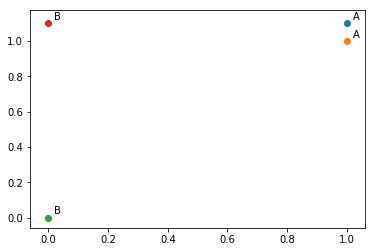

In [6]:
for i in range(group.shape[0]):
  print(i, group[i][0],group[i][1],labels[i])
  plt.scatter(group[i][0],group[i][1])
  plt.text(group[i][0]+0.02,group[i][1]+0.02,labels[i])

In [7]:
df = pd.DataFrame(group, columns=['x','y'])
df

,x,y
0,1.0,1.1
1,1.0,1.0
2,0.0,0.0
3,0.0,1.1


In [8]:
# df = pd.concat((df,pd.Series(labels)),axis=1)

In [9]:
df['label'] = pd.Series(labels)
df

,x,y,label
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,1.1,B


In [10]:
df['cate'] = df['label'].apply(lambda x:0 if x=='A' else 1)
df

,x,y,label,cate
0,1.0,1.1,A,0
1,1.0,1.0,A,0
2,0.0,0.0,B,1
3,0.0,1.1,B,1


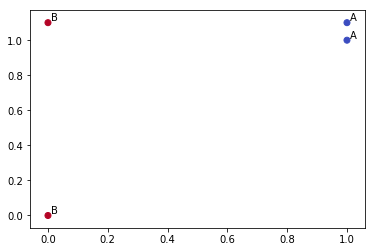

In [11]:
plt.scatter(df.x,df.y,c=df.cate, cmap='coolwarm') # str cannot be used as 'c' value
for i in range(df.shape[0]):
  plt.text(df.x[i]+0.01,df.y[i]+0.01,df.label[i])

## 2-1 KNN Algorithm

In [12]:
def classify0(inX, dataset, labels, k):
  dataset_row = dataset.shape[0]
  diff = np.tile(inX, (dataset_row,1)) - dataset # only copy row, cuz input vector has same dim as dataset
  # each sample in dataset will - input vector, so copy input as the shape of dataset  
  sqdiff = diff**2
  sum_sqdiff = sqdiff.sum(axis=1) # sqdiff.sum() add all elements in matrix
  distance = sum_sqdiff**0.5
  sort_distance_idx = distance.argsort() # can not use sorted(distance) 
  vote_label = {}
  for i in range(k):
    label = labels[ sort_distance_idx[i] ]    
    vote_label[label] = vote_label.get(label,0)+1
#     print(label)
  sort_vote_label = sorted(vote_label.items(), key=lambda x : x[1], reverse=True)
#   print(vote_label,sort_vote_label)
#   print(sqdiff, '\n', sum_sqdiff, '\n',sqdiff.sum(), '\n',distance)
#   print(sort_distance_idx,)

  return sort_vote_label[0][0]


classify0([0,0], group, labels, 3)

'B'

- **np.tile()**

In [13]:
np.tile(['a','b'],(2,2))

array([['a', 'b', 'a', 'b'],
       ['a', 'b', 'a', 'b']], dtype='<U1')

- **dict.get()**

In [14]:
a = {'x':1,'y':2}

In [15]:
a.get('z',0)

0

In [16]:
a['z'] = a.get('z',0)
a

{'x': 1, 'y': 2, 'z': 0}

## Install pydrive to manipulate google drive

### Install

In [18]:
# !pip install pydrive

In [17]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [19]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [20]:
# !ls

adc.json  sample_data


In [21]:
# !pwd

/content


### Get root files id

In [20]:
# file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList() # q = query/search

In [21]:
# for file in file_list:
#   print(file)
#   print('\n title: %s,\n id: %s,\n mimeType: %s \n' % (file['title'], file['id'], file["mimeType"]))

### Go to subfolder with same command above

In [22]:
# # 1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_
# ML_inAction_list = drive.ListFile({'q': "'1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_' in parents and trashed=false"}).GetList()
# for file in ML_inAction_list:
#   print('\n title: %s,\n id: %s,\n mimeType: %s \n' % (file['title'], file['id'], file["mimeType"]))

### Read an existed file

In [23]:
# file = drive.CreateFile({'id': "17B8sLs13NajyXqUsFsS_R2x8vy6AJtHd"})
# file.GetContentFile('datingTestSet2.txt','text/plain') 
# with open('datingTestSet2.txt') as f:
#   print(f)
#   print(f.readlines())


In [24]:
# data_df = pd.read_csv('datingTestSet2.txt',sep='\t',header=None)
# print(data_df.shape)
# data_df.head()

## 2-2 Text to Numpy



1. 每年飞行里程数
2. 玩游戏所占时间百分比
3. 每周消费冰激凌公斤数

In [25]:
fr = open('./datingTestSet2.txt')
fr

<_io.TextIOWrapper name='./datingTestSet2.txt' mode='r' encoding='cp936'>

In [26]:
lines_list = fr.readlines()
lines_list[:2]

['40920\t8.326976\t0.953952\t3\n', '14488\t7.153469\t1.673904\t2\n']

In [27]:
len(lines_list)

1000

In [28]:
np.zeros((len(lines_list),3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [29]:
lines_list[0].strip().split('\t')

['40920', '8.326976', '0.953952', '3']

In [30]:
def file2matrix(filename):
  file = open(filename)
  file_lines = file.readlines()
  length = len(file_lines)
  matrix = np.zeros((length, 3))
  label = []
  for idx, line in enumerate(file_lines):
    split_row = line.strip() # cut by enter \n
    split_element = split_row.split('\t')
    matrix[idx,:] = split_element[0:3] # only 0,1,2 not include 3
    label.append(split_element[-1])
  return matrix,np.array(label)

In [31]:
matrix,label = file2matrix('datingTestSet2.txt')

In [32]:
matrix

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [33]:
matrix.shape

(1000, 3)

In [34]:
label[:5]

array(['3', '2', '1', '1', '1'], dtype='<U1')

In [35]:
label.shape

(1000,)

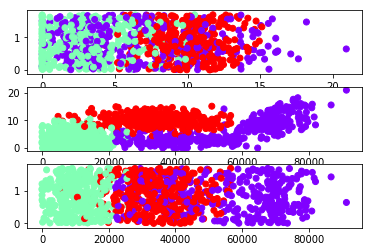

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.scatter(matrix[:,1],matrix[:,2],c=label,cmap='rainbow')

ax2 = fig.add_subplot(312)
ax2.scatter(matrix[:,0],matrix[:,1],c=label,cmap='rainbow')

ax3 = fig.add_subplot(313)
ax3.scatter(matrix[:,0],matrix[:,2],c=label,cmap='rainbow')

## 2-3 Normalization 归一化

- 数值较大的属性会对结果产生较大的影响，因此归一化后，使得各个特征对结果有同样的影响，即每个特征同等重要
- 改变数值范围，虽然增加了分类器的复杂度，但可以得到准确结果
- 
$$ x = \frac{x-min}{max-min} , range(0,1)$$ 

In [37]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 1.1]])

In [38]:
group.min(axis=0) # each col's min and max, for each feature

array([0., 0.])

In [39]:
group.max(axis=0)

array([1. , 1.1])

In [40]:
np.zeros(group.shape)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [41]:
def autoNorm(dataset):
  min_val = dataset.min(axis=0)
  max_val = dataset.max(axis=0)
  max_min_range = max_val - min_val
  norm_dataset = np.zeros(dataset.shape)
  row = dataset.shape[0]
  norm_dataset = dataset - np.tile(min_val,(row,1))
  norm_dataset = norm_dataset / np.tile(max_min_range,(row,1))
  return norm_dataset, max_min_range, min_val

In [42]:
autoNorm(group)

(array([[1.        , 1.        ],
        [1.        , 0.90909091],
        [0.        , 0.        ],
        [0.        , 1.        ]]), array([1. , 1.1]), array([0., 0.]))

In [43]:
norm_matrix, val_range, min_val = autoNorm(matrix)

In [44]:
norm_matrix

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [45]:
val_range

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [46]:
min_val

array([0.      , 0.      , 0.001156])

## 2-4 Test code of dating website

- NOT Good due to not select test sample randomly

In [47]:
def datingClassTest():
  ratio = 0.01
  feature_arr,labels = file2matrix('datingTestSet2.txt')
  norm_feature, val_range, min_val = autoNorm(feature_arr)
  test_sample_num = int(norm_feature.shape[0] * ratio) # 1000 * 0.1 = 100 NO Random!!!??
  error_count = 0
  for i in range(test_sample_num):
    test_result = classify0(norm_feature[i,:], norm_feature[test_sample_num:,:], labels, 5)
    print(norm_feature[i])
    print('test result is : {}, true label is {}'.format(test_result, label[i]))
    if (test_result != label[i]):
      error_count += 1
  print('Total error rate is: {}'.format(error_count/test_sample_num))

In [48]:
datingClassTest()

[0.44832535 0.39805139 0.56233353]
test result is : 1, true label is 3
[0.15873259 0.34195467 0.98724416]
test result is : 1, true label is 2
[0.28542943 0.06892523 0.47449629]
test result is : 3, true label is 1
[0.82320073 0.62848007 0.25248929]
test result is : 3, true label is 1
[0.42010233 0.07982027 0.0785783 ]
test result is : 1, true label is 1
[0.79972171 0.48480189 0.60896055]
test result is : 2, true label is 1
[0.39385141 0.32652986 0.71533516]
test result is : 2, true label is 3
[0.46745478 0.63464542 0.32031191]
test result is : 1, true label is 3
[0.73950675 0.41261212 0.44153637]
test result is : 2, true label is 1
[0.38875681 0.58668982 0.88936006]
test result is : 1, true label is 3
Total error rate is: 0.9


### data explore

In [49]:
data_df = pd.DataFrame(norm_matrix, columns=['fly','game','icecream'])

In [50]:
data_df['label'] = label

In [51]:
data_df.head()

,fly,game,icecream,label
0,0.448325,0.398051,0.562334,3
1,0.158733,0.341955,0.987244,2
2,0.285429,0.068925,0.474496,1
3,0.823201,0.628480,0.252489,1
4,0.420102,0.079820,0.078578,1


In [52]:
data_df.label.value_counts()

1    342
2    331
3    327
Name: label, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [54]:
X = data_df[['fly','game','icecream']]
y = data_df['label']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
score

0.92

## Predict 

In [57]:
def classifyPerson():
  result_list = ['not at all', 'in small does', 'in large does']
  input_fly = float(input('fly miles: '))
  input_game = float(input('game time: '))  
  input_icecream = float(input('ice cream: '))
  
  feature_arr, labels = file2matrix('datingTestSet2.txt')
  norm_feat, val_range, min_val = autoNorm(feature_arr)
  
  input_arr = np.array([input_fly, input_game, input_icecream])
  pred_result = classify0((input_arr-min_val)/val_range, norm_feat, labels, 3)
  
  print(pred_result, 'you probably like this person {}'.format(result_list[int(pred_result)-1]))

In [58]:
classifyPerson()

fly miles: 30000
game time: 10
ice cream: 0.1
3 you probably like this person in large does


# 2. Handwriting


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [60]:
def img2vector(filename):
    img_vector = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        line_str = fr.readline()
        for j in range(32):
            img_vector[0, 32*i+j] = int(line_str[j])
    return img_vector

In [61]:
len(os.listdir('./trainingDigits')) #1_113.txt

1934

In [62]:
img7_11 = img2vector('./testDigits/7_11.txt')

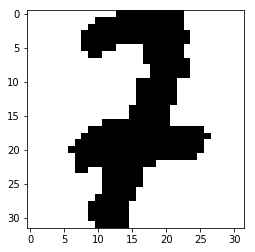

In [63]:
plt.imshow(img7_11.reshape(32,32), cmap='Greys')

In [66]:
def handwritingClassTest():
    hwlabels = []
    train_file_list = os.listdir('./trainingDigits/')
    tr_len = len(train_file_list)
    tr_matrix = np.zeros((tr_len,1024))
    for i in range(tr_len):
        filename =  train_file_list[i]
        tr_label = filename.split('_')[0]
        hwlabels.append(tr_label)
        tr_matrix[i,:] = img2vector('./trainingDigits/{}'.format(filename))
    
    error_count = 0
    
    test_file_list = os.listdir('./testDigits/')
    te_len = len(test_file_list)
    for i in range(te_len):
        filename = test_file_list[i]
        te_label = filename.split('_')[0]
        img_vector = img2vector('./testDigits/{}'.format(filename))
        
        pred_result = classify0(img_vector, tr_matrix, hwlabels, 3)
#         print('predict: {}, True label: {}'.format(pred_result, te_label))
        if(pred_result != te_label):
            error_count += 1
    print('Errer Rate: {}'.format(error_count/te_len))
    

In [67]:
%%time
handwritingClassTest()

Errer Rate: 0.010570824524312896
Wall time: 1min 29s
